In [1]:
semantic_id_to_name_map = {
    0  : "unknown",
    1  : "wall",
    2  : "floor",
    3  : "cabinet",
    4  : "bed",
    5  : "chair",
    6  : "sofa",
    7  : "table",
    8  : "door",
    9  : "window",
    10 : "bookshelf",
    11 : "picture",
    12 : "counter",
    13 : "blinds",
    14 : "desk",
    15 : "shelves",
    16 : "curtain",
    17 : "dresser",
    18 : "pillow",
    19 : "mirror",
    20 : "floormat",
    21 : "clothes",
    22 : "ceiling",
    23 : "books",
    24 : "refrigerator",
    25 : "television",
    26 : "paper",
    27 : "towel",
    28 : "showercurtain",
    29 : "box",
    30 : "whiteboard",
    31 : "person",
    32 : "nightstand",
    33 : "toilet",
    34 : "sink",
    35 : "lamp",
    36 : "bathtub",
    37 : "bag",
    38 : "otherstruct",
    39 : "otherfurniture",
    40 : "otherprop" }

colors = [
    [-1,-1,-1],
    [174,199,232],
    [152,223,138],
    [31,119,180],
    [255,187,120],
    [188,189,34],
    [140,86,75],
    [255,152,150],
    [214,39,40],
    [197,176,213],
    [148,103,189],
    [196,156,148],
    [23,190,207],
    [178,76,76],
    [247,182,210],
    [66,188,102],
    [219,219,141],
    [140,57,197],
    [202,185,52],
    [51,176,203],
    [200,54,131],
    [92,193,61],
    [78,71,183],
    [172,114,82],
    [255,127,14],
    [91,163,138],
    [153,98,156],
    [140,153,101],
    [158,218,229],
    [100,125,154],
    [178,127,135],
    [120,185,128],
    [146,111,194],
    [44,160,44],
    [112,128,144],
    [96,207,209],
    [227,119,194],
    [213,92,176],
    [94,106,211],
    [82,84,163],
    [100,85,144]
]

for k,v in semantic_id_to_name_map.items():
  print (f"Label( '{v}' \t, {k}, \t {tuple(colors[k])} ),")

Label( 'unknown' 	, 0, 	 (-1, -1, -1) ),
Label( 'wall' 	, 1, 	 (174, 199, 232) ),
Label( 'floor' 	, 2, 	 (152, 223, 138) ),
Label( 'cabinet' 	, 3, 	 (31, 119, 180) ),
Label( 'bed' 	, 4, 	 (255, 187, 120) ),
Label( 'chair' 	, 5, 	 (188, 189, 34) ),
Label( 'sofa' 	, 6, 	 (140, 86, 75) ),
Label( 'table' 	, 7, 	 (255, 152, 150) ),
Label( 'door' 	, 8, 	 (214, 39, 40) ),
Label( 'window' 	, 9, 	 (197, 176, 213) ),
Label( 'bookshelf' 	, 10, 	 (148, 103, 189) ),
Label( 'picture' 	, 11, 	 (196, 156, 148) ),
Label( 'counter' 	, 12, 	 (23, 190, 207) ),
Label( 'blinds' 	, 13, 	 (178, 76, 76) ),
Label( 'desk' 	, 14, 	 (247, 182, 210) ),
Label( 'shelves' 	, 15, 	 (66, 188, 102) ),
Label( 'curtain' 	, 16, 	 (219, 219, 141) ),
Label( 'dresser' 	, 17, 	 (140, 57, 197) ),
Label( 'pillow' 	, 18, 	 (202, 185, 52) ),
Label( 'mirror' 	, 19, 	 (51, 176, 203) ),
Label( 'floormat' 	, 20, 	 (200, 54, 131) ),
Label( 'clothes' 	, 21, 	 (92, 193, 61) ),
Label( 'ceiling' 	, 22, 	 (78, 71, 183) ),
Label( 'books' 	, 2

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import h5py
from matplotlib import pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.transforms import functional as F

In [2]:
csv_file = '../data/train_data.csv'
data     = pd.read_csv(csv_file, index_col=0)
data

,Depth Path,Image Path,Instance Segmentation Path,Semantic Segmentation Path
0,hypersim_data/ai_041_003/images/scene_cam_00_g...,hypersim_data/ai_041_003/images/scene_cam_00_f...,hypersim_data/ai_041_003/images/scene_cam_00_g...,hypersim_data/ai_041_003/images/scene_cam_00_g...
1,hypersim_data/ai_003_002/images/scene_cam_01_g...,hypersim_data/ai_003_002/images/scene_cam_01_f...,hypersim_data/ai_003_002/images/scene_cam_01_g...,hypersim_data/ai_003_002/images/scene_cam_01_g...
2,hypersim_data/ai_023_002/images/scene_cam_01_g...,hypersim_data/ai_023_002/images/scene_cam_01_f...,hypersim_data/ai_023_002/images/scene_cam_01_g...,hypersim_data/ai_023_002/images/scene_cam_01_g...
3,hypersim_data/ai_008_007/images/scene_cam_01_g...,hypersim_data/ai_008_007/images/scene_cam_01_f...,hypersim_data/ai_008_007/images/scene_cam_01_g...,hypersim_data/ai_008_007/images/scene_cam_01_g...
4,hypersim_data/ai_027_008/images/scene_cam_00_g...,hypersim_data/ai_027_008/images/scene_cam_00_f...,hypersim_data/ai_027_008/images/scene_cam_00_g...,hypersim_data/ai_027_008/images/scene_cam_00_g...
...,...,...,...,...
11923,hypersim_data/ai_045_010/images/scene_cam_00_g...,hypersim_data/ai_045_010/images/scene_cam_00_f...,hypersim_data/ai_045_010/images/scene_cam_00_g...,hypersim_data/ai_045_010/images/scene_cam_00_g...
11924,hypersim_data/ai_017_008/images/scene_cam_01_g...,hypersim_data/ai_017_008/images/scene_cam_01_f...,hypersim_data/ai_017_008/images/scene_cam_01_g...,hypersim_data/ai_017_008/images/scene_cam_01_g...
11925,hypersim_data/ai_050_002/images/scene_cam_03_g...,hypersim_data/ai_050_002/images/scene_cam_03_f...,hypersim_data/ai_050_002/images/scene_cam_03_g...,hypersim_data/ai_050_002/images/scene_cam_03_g...
11926,hypersim_data/ai_017_009/images/scene_cam_02_g...,hypersim_data/ai_017_009/images/scene_cam_02_f...,hypersim_data/ai_017_009/images/scene_cam_02_g...,hypersim_data/ai_017_009/images/scene_cam_02_g...


In [3]:
idx = 5
print(data.loc[idx, 'Image Path'], '\n',  data.loc[idx, 'Depth Path'], '\n', data.loc[idx, 'Semantic Segmentation Path'], data.loc[idx, 'Instance Segmentation Path'])

hypersim_data/ai_048_007/images/scene_cam_01_final_preview/frame.0035.color.jpg 
 hypersim_data/ai_048_007/images/scene_cam_01_geometry_hdf5/frame.0035.depth_meters.hdf5 
 hypersim_data/ai_048_007/images/scene_cam_01_geometry_hdf5/frame.0035.semantic.hdf5 hypersim_data/ai_048_007/images/scene_cam_01_geometry_hdf5/frame.0035.semantic_instance.hdf5


In [5]:
data_path = '../data/hypersim_data/'
img_path = data.loc[idx, 'Image Path']
img = Image.open(data_path + img_path)

In [6]:
img = img.convert('RGB')
print(img.format)
np.asarray(img)

None


array([[[213, 201, 189],
        [232, 220, 208],
        [232, 220, 208],
        ...,
        [249, 243, 227],
        [253, 253, 245],
        [255, 255, 255]],

       [[223, 211, 199],
        [224, 212, 200],
        [226, 214, 202],
        ...,
        [252, 246, 230],
        [255, 255, 247],
        [255, 255, 255]],

       [[217, 205, 193],
        [217, 205, 193],
        [216, 204, 192],
        ...,
        [255, 251, 235],
        [255, 255, 248],
        [255, 255, 255]],

       ...,

       [[211, 195, 182],
        [219, 203, 190],
        [220, 204, 191],
        ...,
        [229, 168, 124],
        [224, 161, 120],
        [206, 143, 102]],

       [[224, 208, 195],
        [223, 207, 194],
        [220, 204, 191],
        ...,
        [224, 162, 121],
        [209, 147, 106],
        [208, 146, 105]],

       [[222, 206, 193],
        [223, 207, 194],
        [232, 216, 203],
        ...,
        [209, 151, 113],
        [212, 152, 115],
        [209, 149, 112]]

In [7]:
depth_path = data.loc[idx, 'Depth Path']
depth = np.array(h5py.File(data_path + depth_path, 'r').get('dataset'))
depth

array([[3.154, 3.156, 3.156, ..., 5.117, 5.117, 5.117],
       [3.154, 3.154, 3.156, ..., 5.117, 5.117, 5.113],
       [3.154, 3.154, 3.154, ..., 5.117, 5.113, 5.113],
       ...,
       [3.252, 3.252, 3.254, ..., 3.17 , 3.172, 3.174],
       [3.252, 3.254, 3.254, ..., 3.162, 3.164, 3.166],
       [3.254, 3.254, 3.256, ..., 3.154, 3.156, 3.158]], dtype=float16)

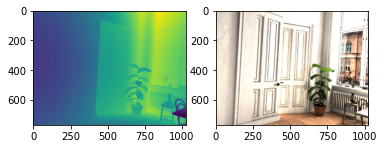

In [8]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(depth.astype(np.float32))
ax[1].imshow(img)

In [9]:
semseg_path = data.loc[idx, 'Semantic Segmentation Path']
semseg = np.array(h5py.File(data_path + semseg_path, 'r').get('dataset'))
semseg

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5]], dtype=int16)

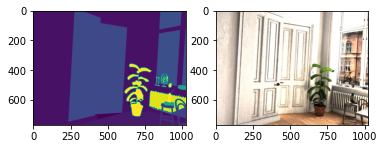

In [10]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(semseg.astype(np.float32))
ax[1].imshow(img)

In [11]:
instseg_path = data.loc[idx, 'Instance Segmentation Path']
instseg = np.array(h5py.File(data_path + instseg_path, 'r').get('dataset'))
instseg

array([[ -1,  -1,  -1, ...,  -1,  -1,  -1],
       [ -1,  -1,  -1, ...,  -1,  -1,  -1],
       [ -1,  -1,  -1, ...,  -1,  -1,  -1],
       ...,
       [ -1,  -1,  -1, ..., 126, 126, 126],
       [ -1,  -1,  -1, ..., 126, 126, 126],
       [ -1,  -1,  -1, ..., 126, 126, 126]], dtype=int16)

In [12]:
np.unique(instseg)

array([ -1, 125, 126, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 170, 171, 172, 173, 174, 175, 176], dtype=int16)

In [14]:
out_size = (192, 256)
resize_img = transforms.Compose([transforms.Resize(size = out_size),
                                              transforms.ToTensor(),
                                            #   transforms.Normalize((0.485, 0.456, 0.406), (0.229 0.224, 0.225))
                                ])
resize_label = transforms.Compose([transforms.Resize(size = out_size, interpolation=Image.NEAREST),
                                                 transforms.ToTensor(), 
                                                ])

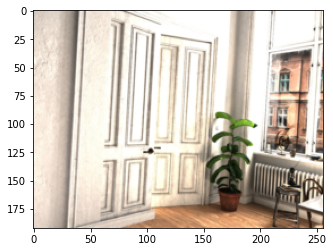

In [15]:
transformed_img = resize_img(img)
plt.imshow(transformed_img.permute((1,2,0)))


In [21]:
import sys
sys.path.insert(0,'..')

import importlib
import dataloader
importlib.reload(dataloader)
from dataloader import *
import gc

In [2]:
#Calculate image stats
train_dataset = HypersimDataset(csv_file='data/train_data.csv')
dl = torch.utils.data.DataLoader(train_dataset, batch_size=250, shuffle=False, num_workers=0)

total_mean = []
total_std = []
for i, im in enumerate(dl):
    print(i)
    numpy_image = im.numpy()

    batch_mean = np.mean(numpy_image, axis=(0,2,3)) #axis 1 is the channel
    batch_std = np.std(numpy_image, axis=(0,2,3))
    total_mean.append(batch_mean)
    total_std.append(batch_std)
    
    del numpy_image
    gc.collect()

total_mean = np.array(total_mean).mean(axis=0)
total_std = np.array(total_std).mean(axis=0)

print(total_mean)
print(total_std)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
[0.42228138 0.38978338 0.35851502]
[0.36771345 0.3644459  0.36256394]


tensor([[[ 0,  0,  0,  ..., 22, 22, 22],
         [ 0,  0,  0,  ..., 22, 22, 22],
         [ 0,  0,  0,  ..., 22, 22, 22],
         ...,
         [ 2,  2,  2,  ...,  2,  2,  2],
         [ 2,  2,  2,  ...,  2,  2,  2],
         [ 2,  2,  2,  ...,  2,  2,  2]]], dtype=torch.int32)


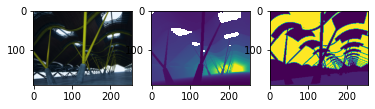

In [27]:
train_dataset = HypersimDataset(csv_file='../data/train_data.csv', data_path='../data/hypersim_data/')
dl = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=False, num_workers=0)

for i, (img, depth, semseg) in enumerate(dl):
    ex_i = 10
    ex_img = img[ex_i, :, :, :] - img[0, :, :, :].min()
    ex_img = ex_img/ex_img.max()

    ex_depth = depth[ex_i, :, :, :]
    ex_semseg = semseg[ex_i, :, :, :]

    fig, ax = plt.subplots(1,3)
    ax[0].imshow(ex_img.permute((1,2,0)))
    ax[1].imshow(ex_depth.permute((1,2,0)))
    ax[2].imshow(ex_semseg.permute((1,2,0)))

    print(ex_semseg)
    break

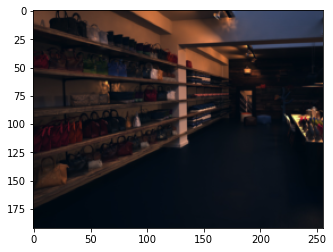

In [22]:
ex_img = img[0, :, :, :] - img[0, :, :, :].min()
ex_img = ex_img/ex_img.max()
plt.imshow(ex_img.permute((1,2,0)))

[[ 0  0  0 ... 22 22 22]
 [ 0  0  0 ... 22 22 22]
 [ 0  0  0 ... 22 22 22]
 ...
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]
 [ 2  2  2 ...  2  2  2]]
[ 0  2 22]


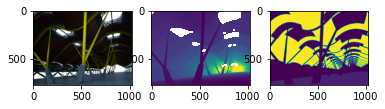

In [28]:
idx = 10

csv_file = '../data/train_data.csv'
data     = pd.read_csv(csv_file, index_col=0)

data_path = '../data/hypersim_data/'
img_path = data.loc[idx, 'Image Path']
img = Image.open(data_path + img_path)

depth_path = data.loc[idx, 'Depth Path']
depth = np.array(h5py.File(data_path + depth_path, 'r').get('dataset'))

semseg_path = data.loc[idx, 'Semantic Segmentation Path']
semseg = np.array(h5py.File(data_path + semseg_path, 'r').get('dataset'))
semseg[semseg == -1] = 0

fig, ax = plt.subplots(1,3)
ax[0].imshow(img)
ax[1].imshow(depth.astype(np.float32))
ax[2].imshow(semseg.astype(np.int32))
print(semseg)
print(np.unique(semseg))
